In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing

from sklearn.preprocessing import StandardScaler

### NOT ALL PACKAGES WILL BE USED, WILL BE EDITED AS I GO

# Model tuning, model selection

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


# metrics and evaluation

from sklearn.metrics import mean_squared_error, r2_score

# import dmba
# from dmba import classificationSummary, gainsChart, liftChart, regressionSummary, stepwise_selection, plotDecisionTree
# from dmba.metric import AIC_score, adjusted_r2_score, BIC_score

# regression models
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor


# classification models

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [4]:
# importing data

qb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide_filtered.csv", index_col = 0)
rb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide_filtered.csv", index_col = 0)
wr = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide_filtered.csv", index_col = 0)
te = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide_filtered.csv", index_col = 0)


# 2023 roster data
ros_23 = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/rosters_23.csv", index_col = 0)

In [8]:
# will try to find a way to bring rookies into the mix

ros_23.loc[ros_23['years_exp'] == 0]

,player_name,position,player_id,height,weight,years_exp,season,Team,tm
4,Clayton Tune,QB,00-0038582,75.0,220.0,0.0,2023.0,Arizona Cardinals,ARI
10,Emari Demercado,RB,00-0038705,69.0,210.0,0.0,2023.0,Arizona Cardinals,ARI
19,Joel Honigford,TE,00-0038706,76.0,260.0,0.0,2023.0,Arizona Cardinals,ARI
20,Blake Whiteheart,TE,00-0038710,76.0,243.0,0.0,2023.0,Arizona Cardinals,ARI
32,Michael Wilson,WR,00-0038559,74.0,209.0,0.0,2023.0,Arizona Cardinals,ARI
...,...,...,...,...,...,...,...,...,...
3783,Kazmeir Allen,WR,00-0038830,68.0,175.0,0.0,2023.0,Washington Commanders,WAS
3784,Zion Bowens,WR,00-0038831,73.0,185.0,0.0,2023.0,Washington Commanders,WAS
3785,Jalen Sample,WR,00-0038836,78.0,200.0,0.0,2023.0,Washington Commanders,WAS
3786,Mitchell Tinsley,WR,00-0038839,73.0,205.0,0.0,2023.0,Washington Commanders,WAS


In [9]:
# lets focus on QBs first



qb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv", index_col = 0)

qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,adp_2023,age_2019,age_2020,age_2021,age_2022,age_2023,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,aggressiveness_2023,attempts_2019,attempts_2020,attempts_2021,attempts_2022,attempts_2023,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_distance_2023,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_differential_2023,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_air_yards_to_sticks_2023,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_completed_air_yards_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_time_to_throw_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,completion_percentage_above_expectation_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,depth_team_2019,depth_team_2020,depth_team_2021,depth_team_2022,depth_team_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_completion_percentage_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,interceptions_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_air_distance_2023,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,max_completed_air_distance_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_p

In [10]:
pd.set_option('display.max_columns', None)

qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,adp_2023,age_2019,age_2020,age_2021,age_2022,age_2023,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,aggressiveness_2023,attempts_2019,attempts_2020,attempts_2021,attempts_2022,attempts_2023,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_distance_2023,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_differential_2023,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_air_yards_to_sticks_2023,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_completed_air_yards_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_time_to_throw_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,completion_percentage_above_expectation_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,depth_team_2019,depth_team_2020,depth_team_2021,depth_team_2022,depth_team_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_completion_percentage_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,interceptions_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_air_distance_2023,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,max_completed_air_distance_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_p

In [11]:
years = ['2019', '2020', '2021', '2022']

# Generate the list of column names using list comprehension and str.replace()
last_yr_team_stats = [base_column + year for year in years for base_column in \
           ['totyd_last_yr_tm_stat_', 'pts_scored_last_yr_tm_stat_', 'rushy_last_yr_tm_stat_',
           'passy_last_yr_tm_stat_']]

dfs = [qb, rb, wr, te]

for i in dfs:
    i[last_yr_team_stats] = i[last_yr_team_stats].replace(0, np.nan)

### Initial modeling

Let's try models that don't need too much pre-processing like decision trees and then random forests.

2022 will be the testing year. 2019, 2020, and 2021 data will be used to train the model.

Is there a way to, perhaps, train a model on 2019 data to predict 2020 scores, save what it knows about that, then 2020 to predict 2021, then 2021 to 2022 and aggergate the model's knowledge of how one year will affect the next?

In [12]:
nulls = {'te_prem_pts_pg_5ptd_2019': 0, 'te_prem_pts_pg_5ptd_2020': 0,'te_prem_pts_pg_5ptd_2021': 0,
                             'te_prem_pts_pg_5ptd_2022': 0 , 'te_prem_pts_p5td_2019': 0, 'te_prem_pts_p5td_2020': 0 ,
                             'te_prem_pts_p5td_2021': 0, 'te_prem_pts_p5td_2022': 0}

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

qb.loc[:, subset] = qb.loc[:, subset].fillna(0)
rb.loc[:, subset] = rb.loc[:, subset].fillna(0)
wr.loc[:, subset] = wr.loc[:, subset].fillna(0)
te.loc[:, subset] = te.loc[:, subset].fillna(0)

## 2023 data to utilize in model to make 2023 predictions

In [13]:
### utilizing beautifulsoup to scrape ff22 data!

import requests
from bs4 import BeautifulSoup

# 2023 rankings (current year)

# URL of the website
rank_url = "https://fantasyfootballcalculator.com/adp/half-ppr/12-team/all"

# Send a GET request to the URL
response = requests.get(rank_url)

# Create a BeautifulSoup object with the content of the response
soup = BeautifulSoup(response.content, 'html.parser')

# Find the main table on the page
table = soup.find("table", class_="table adp")

# Find all rows in the table (excluding the header row)
rows = table.find_all("tr")[1:]

# Define lists to store the data
data = []
header = []

# Extract the column names from the header row
for th in table.find_all("th"):
    header.append(th.text.strip())

# Iterate over each row and extract the data
for row in rows:
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

# Create a DataFrame from the data
ranks_23 = pd.DataFrame(data, columns=header)

# Print the DataFrame
print(ranks_23)

       #   Pick                 Name  Pos Team Bye Overall Std.Dev   High  \
0      1   1.01  Christian McCaffrey   RB   SF   9     1.4     0.7   1.01   
1      2   1.02        Austin Ekeler   RB  LAC   5     2.2     0.8   1.01   
2      3   1.02     Justin Jefferson   WR  MIN  13     2.2     0.9   1.01   
3      4   1.04        Ja'Marr Chase   WR  CIN   7     4.0     1.2   1.01   
4      5   1.05       Saquon Barkley   RB  NYG  13     5.1     1.2   1.01   
..   ...    ...                  ...  ...  ...  ..     ...     ...    ...   
231  232  15.06        Van Jefferson   WR  LAR  10   173.6    17.9  12.09   
232  233  15.06         Robert Woods   WR  HOU   7   174.5    20.6  12.10   
233  234  15.07          Graham Gano   PK  CAR   7   174.8    22.3  10.08   
234  235  15.08      Ronald Jones II   RB  DAL   7   176.2    17.0  13.11   
235  236  16.02  LA Chargers Defense  DEF  LAC   5   182.4    14.5  12.10   

       Low TimesDrafted Graph  
0     1.05          575        
1     1.04 

In [14]:
# let's keep only relevant positions (QB, RB, WR, and TE)

ranks_23 = ranks_23.loc[ranks_23['Pos'].isin(['QB', 'RB', 'TE', 'WR'])]

# let's keep only relevant columns
ranks_23 = ranks_23[['#', 'Name', 'Pos', 'Team']]
ranks_23.rename(columns = {'#': 'adp'}, inplace = True)

ranks_23 = ranks_23.set_index('Name')

In [15]:
ranks_23.head()

,adp,Pos,Team
Name,,,
Christian McCaffrey,1,RB,SF
Austin Ekeler,2,RB,LAC
Justin Jefferson,3,WR,MIN
Ja'Marr Chase,4,WR,CIN
Saquon Barkley,5,RB,NYG


In [16]:
qb = qb.join(ranks_23['adp'], how = 'left')
rb = rb.join(ranks_23['adp'], how = 'left')
wr = wr.join(ranks_23['adp'], how = 'left')
te = te.join(ranks_23['adp'], how = 'left')

# dropping old adp_2023 added from earlier notebook
qb.drop(columns = ['adp_2023'], inplace = True)
rb.drop(columns = ['adp_2023'], inplace = True)
wr.drop(columns = ['adp_2023'], inplace = True)
te.drop(columns = ['adp_2023'], inplace = True)

qb.rename(columns = {'adp': 'adp_2023'}, inplace = True)
rb.rename(columns = {'adp': 'adp_2023'}, inplace = True)
wr.rename(columns = {'adp': 'adp_2023'}, inplace = True)
te.rename(columns = {'adp': 'adp_2023'}, inplace = True)

In [17]:
qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,age_2023,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,aggressiveness_2023,attempts_2019,attempts_2020,attempts_2021,attempts_2022,attempts_2023,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_distance_2023,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_differential_2023,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_air_yards_to_sticks_2023,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_completed_air_yards_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_time_to_throw_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,completion_percentage_above_expectation_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,depth_team_2019,depth_team_2020,depth_team_2021,depth_team_2022,depth_team_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_completion_percentage_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,interceptions_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_air_distance_2023,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,max_completed_air_distance_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2

### QB Modeling

Setting up a loop to continually train a model on season data for the following year. Starting with 2019 as training data until 2021, and test data used as the following years.

In [18]:
## Modeling

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
stats = ['adp', 'age', 'avg_intended_air_yards', 'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'te_prem_pts_pg_5ptd', 'passy_last_yr_tm_stat']
target_seasons = ['2020', '2021', '2022']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train = qb[[f'{stat}_{previous_season}' for stat in stats]]
    y_train = qb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()

    # Step 2: Train the Regression Models
    # Choose the regression model you want to use
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    X_test = qb[[f'{stat}_{current_season}' for stat in stats]]
    y_pred = model.predict(X_test)

    # Step 4: Combine Predictions
    qb[f'fantasypoints_pg_{current_season}'] = y_pred
    
    # evaluating the models
    
    y_test = qb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {current_season} season:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------")
    
# The wide_df DataFrame now contains the predicted data for the 2022 season for each player.

C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2020
- age_2020
- avg_intended_air_yards_2020
- completion_percentage_above_expectation_2020
- epa_total_2020
- ...
Feature names seen at fit time, yet now missing:
- adp_2019
- age_2019
- avg_intended_air_yards_2019
- completion_percentage_above_expectation_2019
- epa_total_2019
- ...

  warnings.warn(message, FutureWarning)
C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2021
- age_2021
- avg_intended_air_yards_2021
- completion_percentage_above_expectation_2021
- epa_total_2021
- ...
Feature names seen at fit time, yet now missing:
- adp_2020
- age_2020
- avg_intended_air_

Metrics for 2020 season:
Mean Squared Error: 15.113995823821515
R-squared: 0.7966217698047613
--------------------
Metrics for 2021 season:
Mean Squared Error: 22.255866351866988
R-squared: 0.6304444866372024
--------------------
Metrics for 2022 season:
Mean Squared Error: 11.290691510194183
R-squared: 0.8085150717292215
--------------------


C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2022
- age_2022
- avg_intended_air_yards_2022
- completion_percentage_above_expectation_2022
- epa_total_2022
- ...
Feature names seen at fit time, yet now missing:
- adp_2021
- age_2021
- avg_intended_air_yards_2021
- completion_percentage_above_expectation_2021
- epa_total_2021
- ...

  warnings.warn(message, FutureWarning)


In [30]:
# trying again, but seeing if we can include some 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
past_qb_stats = ['avg_intended_air_yards', 'ttl_opp',  'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'te_prem_pts_pg_5ptd', 'adp']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year

current_qb_stats = ['age',  'passy_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = qb[[f'{stat}_{previous_season}' for stat in past_qb_stats]]
    X_train_c = qb[[f'{stat}_{current_season}' for stat in current_qb_stats]]
    
    column_names_p = X_train_p.columns.tolist()
    column_names_c = X_train_c.columns.tolist()
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    sc = StandardScaler()

    qb_trans = sc.fit_transform(X_train)

    qb_trans = pd.DataFrame(qb_trans, columns = X_train.columns)

    if current_season != '2023':
        y_train = qb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(qb_trans, y_train)
        
        # Step 3: Make Predictions
        X_test_p = qb[[f'{stat}_{previous_season}' for stat in past_qb_stats]]
        X_test_c = qb[[f'{stat}_{current_season}' for stat in current_qb_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
        
        sc = StandardScaler()

        qb_trans_tst = sc.fit_transform(X_test)

        qb_trans_tst = pd.DataFrame(qb_trans_tst, columns = X_test.columns)
    
 
        y_pred = model.predict(qb_trans_tst)
        # Step 4: Combine Predictions
        qb[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = qb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
        
        
    else:
        predictions_23 = model.predict(X_train)
        qb[f'fantasypoints_pg_{current_season}'] = predictions_23
    X_train.columns = column_names_p + column_names_c
    
    

Metrics for 2020 season:
Mean Squared Error: 9.26656295731798
R-squared: 0.8753064910020883
--------------------
Metrics for 2021 season:
Mean Squared Error: 6.469149638890605
R-squared: 0.8925806851091005
--------------------
Metrics for 2022 season:
Mean Squared Error: 6.3835250926695135
R-squared: 0.891738354255725
--------------------


In [33]:
# trying again, but seeing if we can include some 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# can we get use another season of data?


# getting qb relevant stats
past_qb_stats = ['avg_intended_air_yards', 'ttl_opp',  'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'te_prem_pts_pg_5ptd', 'pct_team_yards_qb']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year

current_qb_stats = ['age',  'passy_last_yr_tm_stat']


target_seasons = ['2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    previous_season_2 = str(int(current_season) - 2)
    
    y = 'te_prem_pts_pg_5ptd'
    
        
    X_train_p = qb[[f'{stat}_{previous_season}' for stat in past_qb_stats]]
    X_train_c = qb[[f'{stat}_{current_season}' for stat in current_qb_stats]]
    
    X_train_p2 = qb[[f'{stat}_{previous_season_2}' for stat in past_qb_stats]]
    
    column_names_p = X_train_p.columns.tolist()
    column_names_c = X_train_c.columns.tolist()
    column_names_p2 = X_train_p2.columns.tolist()
    
    
    X_train = pd.concat([X_train_p, X_train_c, X_train_p2], axis = 1, ignore_index = True)
    
    sc = StandardScaler()

    qb_trans = sc.fit_transform(X_train)

    qb_trans = pd.DataFrame(qb_trans, columns = X_train.columns)
    
    if current_season != '2023':
        y_train = qb[[f'{y}_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = qb[[f'{stat}_{previous_season}' for stat in past_qb_stats]]
        X_test_p2 = qb[[f'{stat}_{previous_season_2}' for stat in past_qb_stats]]
        X_test_c = qb[[f'{stat}_{current_season}' for stat in current_qb_stats]]
        X_test = pd.concat([X_test_p, X_test_c, X_test_p2], axis = 1, ignore_index = True)
        
        sc = StandardScaler()

        qb_trans_tst = sc.fit_transform(X_test)

        qb_trans_tst = pd.DataFrame(qb_trans_tst, columns = X_test.columns)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        qb[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = qb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
        
        
    else:
        predictions_23 = model.predict(X_train)
        qb[f'fantasypoints_pg_{current_season}'] = predictions_23
    X_train.columns = column_names_p + column_names_c + column_names_p2
    
    

Metrics for 2021 season:
Mean Squared Error: 4.614255955018707
R-squared: 0.923380932411951
--------------------
Metrics for 2022 season:
Mean Squared Error: 5.356113635175035
R-squared: 0.9091627794173972
--------------------


In [34]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

                                         Feature  Importance
8                     passy_last_yr_tm_stat_2023   23.024304
7                                       age_2023    4.977088
4                                 epa_total_2022    4.158041
1                                   ttl_opp_2022    2.828940
12                               rushingatt_2021    1.348393
3                                rushingatt_2022    1.278761
6                         pct_team_yards_qb_2022    0.997023
5                       te_prem_pts_pg_5ptd_2022    0.976063
2   completion_percentage_above_expectation_2022    0.720109
0                    avg_intended_air_yards_2022    0.608734
15                        pct_team_yards_qb_2021    0.521808
9                    avg_intended_air_yards_2021    0.502830
14                      te_prem_pts_pg_5ptd_2021    0.294028
11  completion_percentage_above_expectation_2021    0.265239
10                                  ttl_opp_2021    0.020923
13                      

Adding in current years experience and adp, it really helped make an even better predictor with R-squared of .852, MSE = 9.90.


In [36]:
pd.set_option('display.max_rows', None)

qb[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].head(10)

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
AJ McCarron,0.000000,-0.859729,0.0000,-0.022578,0.000000,0.147347
Aaron Rodgers,26.922500,22.796329,23.1125,20.291600,15.364706,15.614976
Adrian Martinez,0.000000,0.010674,0.0000,0.043306,0.000000,0.147347
Aidan O'Connell,0.000000,0.010674,0.0000,0.043306,0.000000,0.147347
Alex McGough,0.000000,0.010674,0.0000,0.043306,0.000000,0.147347
Alex Smith,9.697500,3.464195,0.0000,0.041987,0.000000,0.072933
Andy Dalton,13.672727,15.025489,11.0250,9.425983,13.588571,10.920122
Anthony Brown,0.000000,0.673274,0.0000,-0.228705,2.790000,6.904389
Anthony Richardson,0.000000,0.010674,0.0000,0.043306,0.000000,0.147347


In [37]:
# PREDICTIONS FOR 2023

qb_preds_1 = qb[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False).head(35)

qb_preds_1['pos'] = 'QB'
# need team in there, that'd be helpful

qb_preds_1

,fantasypoints_pg_2023,adp_2023,pos
player_name,,,
Jalen Hurts,22.839666,39,QB
Josh Allen,22.839666,34,QB
Justin Fields,21.962129,75,QB
Lamar Jackson,21.133033,62,QB
Daniel Jones,20.660928,130,QB
Joe Burrow,20.602651,53,QB
Geno Smith,19.439626,159,QB
Dak Prescott,19.290670,112,QB
Derek Carr,19.000857,147,QB


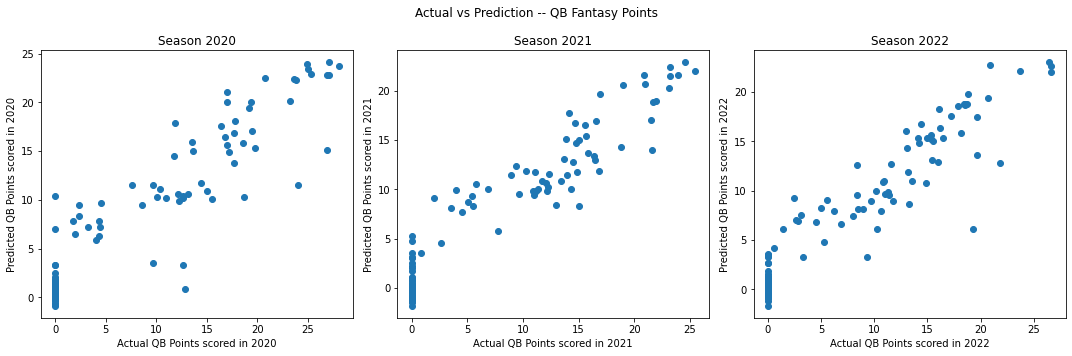

In [38]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- QB Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(qb[f'te_prem_pts_pg_5ptd_{year}'], qb[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual QB Points scored in {year}')
    ax.set_ylabel(f'Predicted QB Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

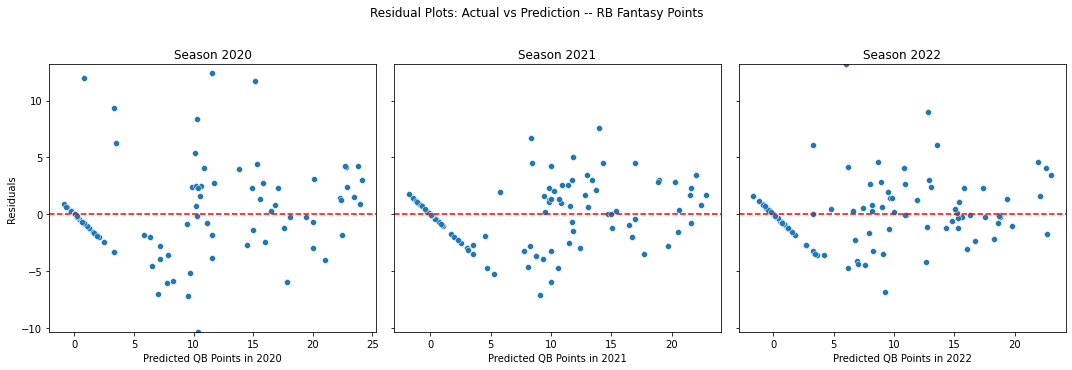

In [39]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = qb[f'te_prem_pts_pg_5ptd_{year}'] - qb[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- RB Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = qb[f'te_prem_pts_pg_5ptd_{year}'] - qb[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=qb[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted QB Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


This model is providing decent results so far, and it seems to get stronger as there is more year by year data. Let's try this same thing with RBs.

### RB Initial Modeling

In [40]:
rb.shape

(119, 565)

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='te_prem_pts_p5td_2022'>

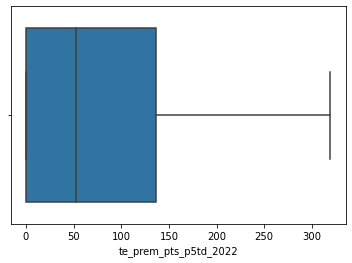

In [41]:
sns.boxplot(rb['te_prem_pts_p5td_2022'])

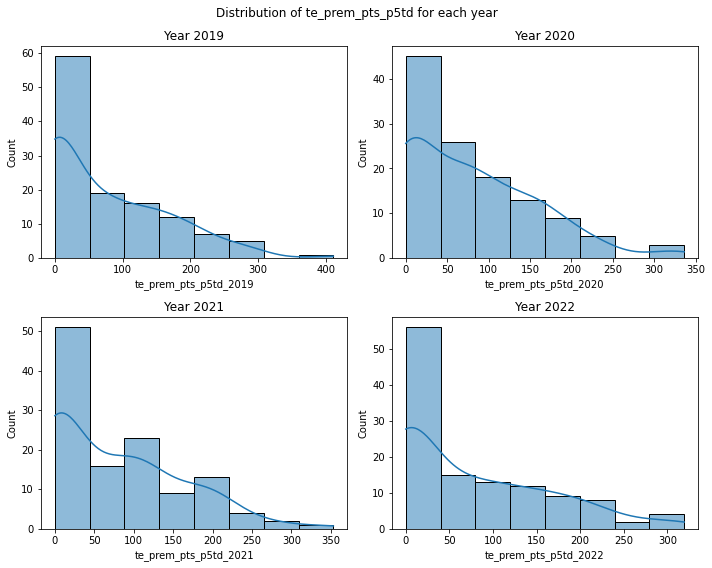

In [42]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Distribution of te_prem_pts_p5td for each year')

# Iterate through each year and create the histogram in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(rb[f'te_prem_pts_p5td_{year}'], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Year {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [49]:
rb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,age_2023,avg_cushion_2019,avg_cushion_2020,avg_cushion_2021,avg_cushion_2022,avg_cushion_2023,avg_expected_yac_2019,avg_expected_yac_2020,avg_expected_yac_2021,avg_expected_yac_2022,avg_expected_yac_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_separation_2019,avg_separation_2020,avg_separation_2021,avg_separation_2022,avg_separation_2023,avg_time_to_los_2019,avg_time_to_los_2020,avg_time_to_los_2021,avg_time_to_los_2022,avg_time_to_los_2023,avg_yac_2019,avg_yac_2020,avg_yac_2021,avg_yac_2022,avg_yac_2023,avg_yac_above_expectation_2019,avg_yac_above_expectation_2020,avg_yac_above_expectation_2021,avg_yac_above_expectation_2022,avg_yac_above_expectation_2023,catch_percentage_2019,catch_percentage_2020,catch_percentage_2021,catch_percentage_2022,catch_percentage_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,depth_team_2019,depth_team_2020,depth_team_2021,depth_team_2022,depth_team_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,efficiency_2019,efficiency_2020,efficiency_2021,efficiency_2022,efficiency_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_rush_yards_2019,expected_rush_yards_2020,expected_rush_yards_2021,expected_rush_yards_2022,expected_rush_yards_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,non_pass_tds_2023,offense_2019,offense_2020,offense_2021,offense_2022,offense_2023,pass_2019,pass_2020,pass_2021,pass_2022,pass_2023,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingatt_2023,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingtd_2023,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passingyds_2023,passy_2019,passy_2020,passy_2021,passy_2022,passy_2023,passy_last_yr_tm_stat_2019,passy_last_yr_tm_stat_2020,passy_last_yr_tm_stat_2021,passy_last_yr_tm_stat_2022,passy_last_yr_tm_stat_2023,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,passyds_allowed_2023,pct_gs_2019,p

In [44]:
# filling nulls similarly as before

# lets replace those 0s with nulls

season = ['2019', '2020', '2021', '2022']

for i in range(len(season)):
    year = season[i]
    rb[[f'adp_{year}']] = rb[[f'adp_{year}']].replace(0, np.nan)

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

rb.loc[:, subset] = rb.loc[:, subset].fillna(0)

In [45]:
rb.adp_2023

player_name
Aaron Jones               31
Adrian Peterson          NaN
Alex Collins             NaN
Alexander Mattison        48
Alvin Kamara              60
Antonio Gibson            83
Austin Ekeler              2
Benny Snell              NaN
Boston Scott             NaN
Breece Hall               22
Brian Hill               NaN
Brian Robinson           NaN
Cam Akers                 46
Carlos Hyde              NaN
Chase Edmonds            137
Chris Carson             NaN
Christian McCaffrey        1
Chuba Hubbard            171
Clyde Edwards-Helaire    134
Cordarrelle Patterson    119
D'Andre Swift             45
D'Ernest Johnson         205
D'Onta Foreman           NaN
Dalvin Cook               30
Dameon Pierce             37
Damien Harris             88
Damien Williams          NaN
Darrel Williams          NaN
Darrell Henderson        NaN
David Johnson            NaN
David Montgomery          59
DeAndre Washington       NaN
DeeJay Dallas            NaN
Deon Jackson             NaN
De

### RB Model

In [50]:
# using 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
past_stats = ['ttl_opp', 'receivingyds', 'rush_pct_over_expected', 'te_prem_pts_pg_5ptd']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'rushy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat', 'pct_team_scrim_yards']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = rb[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = rb[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = rb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = rb[[f'{stat}_{current_season}' for stat in past_stats]]
        X_test_c = rb[[f'{stat}_{current_season}' for stat in current_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        rb[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = rb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        rb[f'fantasypoints_pg_{current_season}'] = predictions_23
    

Metrics for 2020 season:
Mean Squared Error: 5.28717832265909
R-squared: 0.8488390817217157
--------------------
Metrics for 2021 season:
Mean Squared Error: 1.9819141238828872
R-squared: 0.9411165158000041
--------------------
Metrics for 2022 season:
Mean Squared Error: 1.1411475373794215
R-squared: 0.963140043215945
--------------------


In [55]:
# trying again, but seeing if we can include some 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# can we get use another season of data?


# getting qb relevant stats
past_rb_stats = ['ttl_opp', 'receivingyds', 'rush_pct_over_expected', 'te_prem_pts_pg_5ptd', 'pct_team_scrim_yards']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year
current_rb_stats = ['age', 'adp', 'rushy_last_yr_tm_stat']


target_seasons = ['2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    previous_season_2 = str(int(current_season) - 2)
    
    y = 'te_prem_pts_pg_5ptd'
        
    X_train_p = rb[[f'{stat}_{previous_season}' for stat in past_rb_stats]]
    X_train_c = rb[[f'{stat}_{current_season}' for stat in current_rb_stats]]
    
    X_train_p2 = rb[[f'{stat}_{previous_season_2}' for stat in past_rb_stats]]
    
    column_names_p = X_train_p.columns.tolist()
    column_names_c = X_train_c.columns.tolist()
    column_names_p2 = X_train_p2.columns.tolist()
    
    
    X_train = pd.concat([X_train_p, X_train_c, X_train_p2], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = rb[[f'{y}_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = rb[[f'{stat}_{previous_season}' for stat in past_rb_stats]]
        X_test_p2 = rb[[f'{stat}_{previous_season_2}' for stat in past_rb_stats]]
        X_test_c = rb[[f'{stat}_{current_season}' for stat in current_rb_stats]]
        X_test = pd.concat([X_test_p, X_test_c, X_test_p2], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        rb[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = rb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
        
        
    else:
        predictions_23 = model.predict(X_train)
        rb[f'fantasypoints_pg_{current_season}'] = predictions_23
    X_train.columns = column_names_p + column_names_c + column_names_p2
    
    

Metrics for 2021 season:
Mean Squared Error: 2.383308758609078
R-squared: 0.9291909160239871
--------------------
Metrics for 2022 season:
Mean Squared Error: 2.176526575356655
R-squared: 0.9296964915761643
--------------------


In [56]:
# PREDICTIONS FOR 2023

rb_preds_1 = rb[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False).head(50)

rb_preds_1['pos'] = 'RB'
# need team in there, that'd be helpful

rb_preds_1.head(10)

,fantasypoints_pg_2023,adp_2023,pos
player_name,,,
Josh Jacobs,15.084734,12,RB
Derrick Henry,15.044511,8,RB
Nick Chubb,14.598677,10,RB
Christian McCaffrey,14.568357,1,RB
Austin Ekeler,14.336368,2,RB
Dalvin Cook,14.063192,30,RB
Tony Pollard,13.512165,15,RB
Joe Mixon,13.506333,23,RB
Aaron Jones,13.016442,31,RB


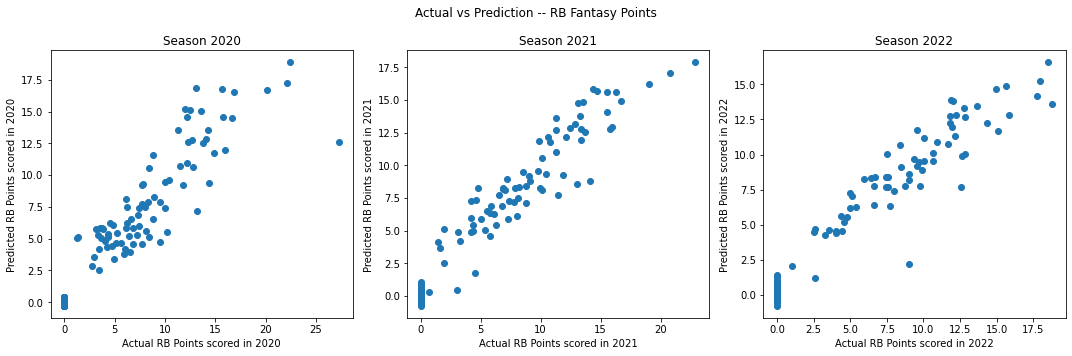

In [57]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- RB Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(rb[f'te_prem_pts_pg_5ptd_{year}'], rb[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual RB Points scored in {year}')
    ax.set_ylabel(f'Predicted RB Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()




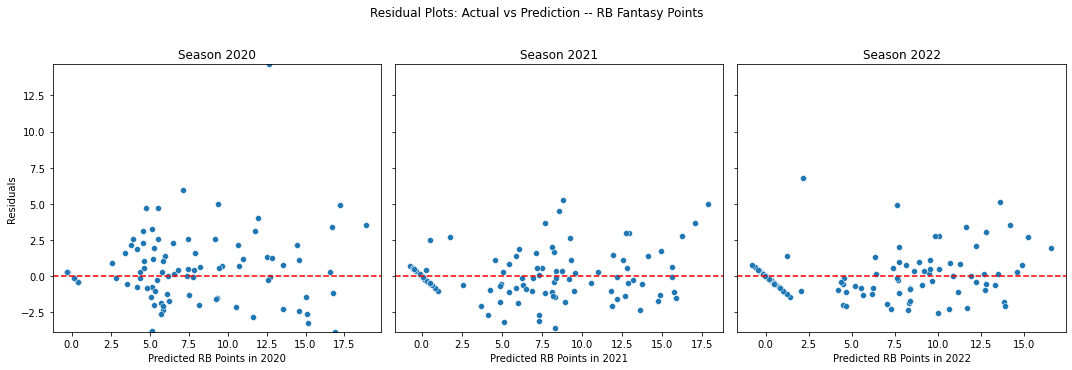

In [58]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = rb[f'te_prem_pts_pg_5ptd_{year}'] - rb[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- RB Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = rb[f'te_prem_pts_pg_5ptd_{year}'] - rb[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=rb[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted RB Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [59]:

# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

                        Feature  Importance
7    rushy_last_yr_tm_stat_2023   12.719299
6                      adp_2023    9.168996
3      te_prem_pts_pg_5ptd_2022    2.622007
11     te_prem_pts_pg_5ptd_2021    1.204580
9             receivingyds_2021    1.094253
1             receivingyds_2022    0.908466
12    pct_team_scrim_yards_2021    0.683121
0                  ttl_opp_2022    0.440647
5                      age_2023    0.366987
8                  ttl_opp_2021    0.324755
2   rush_pct_over_expected_2022    0.269851
10  rush_pct_over_expected_2021    0.218930
4     pct_team_scrim_yards_2022    0.094217


These too seem to be getting better as the model sees more seasons.

# WR

In [60]:
wr.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,age_2023,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,aggressiveness_2023,attempts_2019,attempts_2020,attempts_2021,attempts_2022,attempts_2023,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_distance_2023,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_differential_2023,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_air_yards_to_sticks_2023,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_completed_air_yards_2023,avg_cushion_2019,avg_cushion_2020,avg_cushion_2021,avg_cushion_2022,avg_cushion_2023,avg_expected_yac_2019,avg_expected_yac_2020,avg_expected_yac_2021,avg_expected_yac_2022,avg_expected_yac_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_separation_2019,avg_separation_2020,avg_separation_2021,avg_separation_2022,avg_separation_2023,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_time_to_throw_2023,avg_yac_2019,avg_yac_2020,avg_yac_2021,avg_yac_2022,avg_yac_2023,avg_yac_above_expectation_2019,avg_yac_above_expectation_2020,avg_yac_above_expectation_2021,avg_yac_above_expectation_2022,avg_yac_above_expectation_2023,catch_percentage_2019,catch_percentage_2020,catch_percentage_2021,catch_percentage_2022,catch_percentage_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,completion_percentage_above_expectation_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,depth_team_2019,depth_team_2020,depth_team_2021,depth_team_2022,depth_team_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_completion_percentage_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_202

In [84]:
# wr ADPs 

wr['adp_2020'].head(10)

player_name
A.J. Brown         46.0
A.J. Green         73.0
Adam Humphries      NaN
Adam Thielen       31.0
Albert Wilson       NaN
Alec Pierce         NaN
Alex Erickson       NaN
Allen Hurns         NaN
Allen Lazard      132.0
Allen Robinson     34.0
Name: adp_2020, dtype: float64

In [61]:
# replacing 0's in scoring data with nan's 

wr.loc[:, subset] = wr.loc[:, subset].fillna(0)

In [62]:
# using 'current' season features (like, age or experience, and adp)

# getting wr relevant stats
past_stats = ['ttl_opp', 'percent_share_of_intended_air_yards', 'avg_yac', 
              'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd']

# another feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = wr[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = wr[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = wr[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = wr[[f'{stat}_{current_season}' for stat in past_stats]]
        X_test_c = wr[[f'{stat}_{current_season}' for stat in current_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        wr[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = wr[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        wr[f'fantasypoints_pg_{current_season}'] = predictions_23
    

Metrics for 2020 season:
Mean Squared Error: 2.9968239461018182
R-squared: 0.879110216045744
--------------------
Metrics for 2021 season:
Mean Squared Error: 4.88379564231368
R-squared: 0.7769488017415893
--------------------
Metrics for 2022 season:
Mean Squared Error: 3.017767778325486
R-squared: 0.871898959754416
--------------------


In [64]:
# trying again, but seeing if we can include data from 2 years back. it seems to have helped QB and RB models

# setting for reproducibility

np.random.seed(11)

# can we get use another season of data?


# getting qb relevant stats
past_wr_stats = ['ttl_opp', 'percent_share_of_intended_air_yards', 'avg_yac', 
              'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd', 'pct_team_rec_yards']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year
current_wr_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    previous_season_2 = str(int(current_season) - 2)
    
    y = 'te_prem_pts_pg_5ptd'
        
    X_train_p = wr[[f'{stat}_{previous_season}' for stat in past_wr_stats]]
    X_train_c = wr[[f'{stat}_{current_season}' for stat in current_wr_stats]]
    
    X_train_p2 = wr[[f'{stat}_{previous_season_2}' for stat in past_wr_stats]]
    
    column_names_p = X_train_p.columns.tolist()
    column_names_c = X_train_c.columns.tolist()
    column_names_p2 = X_train_p2.columns.tolist()
    
    
    X_train = pd.concat([X_train_p, X_train_c, X_train_p2], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = wr[[f'{y}_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = wr[[f'{stat}_{previous_season}' for stat in past_wr_stats]]
        X_test_p2 = wr[[f'{stat}_{previous_season_2}' for stat in past_wr_stats]]
        X_test_c = wr[[f'{stat}_{current_season}' for stat in current_wr_stats]]
        X_test = pd.concat([X_test_p, X_test_c, X_test_p2], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        wr[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = wr[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
        
        
    else:
        predictions_23 = model.predict(X_train)
        wr[f'fantasypoints_pg_{current_season}'] = predictions_23
    X_train.columns = column_names_p + column_names_c + column_names_p2
    
    

Metrics for 2021 season:
Mean Squared Error: 0.9947453350414608
R-squared: 0.9545682999057987
--------------------
Metrics for 2022 season:
Mean Squared Error: 0.9127311471641488
R-squared: 0.9612555312386725
--------------------


In [65]:
wr[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sample(10)

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Drake London,0.000000,0.112530,0.000000,0.232741,8.270588,8.858981
Greg Ward,6.537500,7.296853,0.000000,0.332426,0.000000,0.087611
Miles Boykin,3.756250,6.425927,0.000000,0.527965,0.000000,0.571769
Darius Slayton,7.250000,9.079418,4.276923,4.937513,6.587500,5.831578
A.J. Brown,14.750000,15.970447,11.492308,12.001968,15.035294,14.429551
Tyler Lockett,13.462500,13.851768,12.681250,12.326798,12.206250,12.177350
DaeSean Hamilton,3.175000,6.451451,0.000000,-0.073625,0.000000,0.005412
D.K. Metcalf,0.000000,0.141018,0.000000,0.176711,0.000000,1.311340
Michael Gallup,8.987500,10.494515,8.222222,9.341497,6.135714,6.261904


In [66]:
# how did it do last year in prdicting ppg?

wr[['te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sort_values('fantasypoints_pg_2022', ascending = False)

,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,
Davante Adams,16.794118,16.549134
Cooper Kupp,18.211111,16.291013
Justin Jefferson,17.803529,16.012330
Ja'Marr Chase,16.575000,15.660772
Stefon Diggs,16.412500,15.530291
Tyreek Hill,16.570588,15.012891
CeeDee Lamb,14.594118,14.714993
A.J. Brown,15.035294,14.429551
DeAndre Hopkins,13.300000,13.281442


In [67]:
# PREDICTIONS FOR 2023

# PREDICTIONS FOR 2023

wr_preds_1 = wr[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False).head(60)

wr_preds_1['pos'] = 'WR'
# need team in there, that'd be helpful

wr_preds_1.head(10)

,fantasypoints_pg_2023,adp_2023,pos
player_name,,,
Amon-Ra St. Brown,16.203905,25,WR
Jaylen Waddle,15.651238,24,WR
Cooper Kupp,15.640499,11,WR
Tyreek Hill,15.278064,13,WR
Davante Adams,15.203066,18,WR
Justin Jefferson,15.065096,3,WR
Stefon Diggs,14.658682,14,WR
CeeDee Lamb,14.259706,17,WR
Ja'Marr Chase,14.092174,4,WR


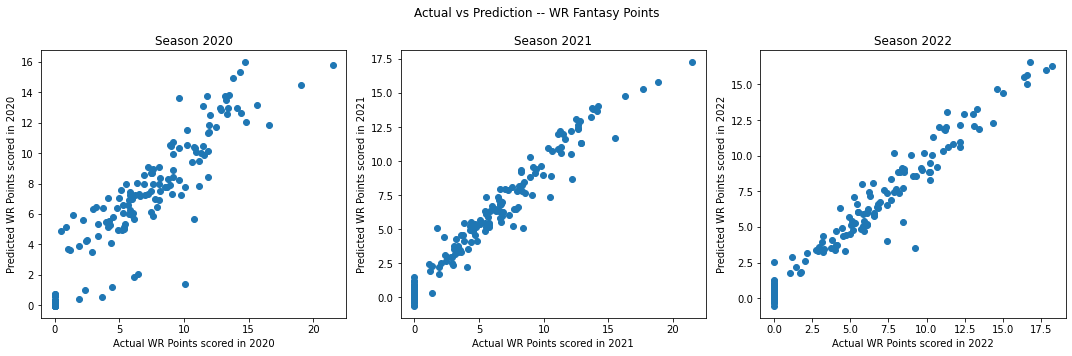

In [68]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- WR Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(wr[f'te_prem_pts_pg_5ptd_{year}'], wr[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual WR Points scored in {year}')
    ax.set_ylabel(f'Predicted WR Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

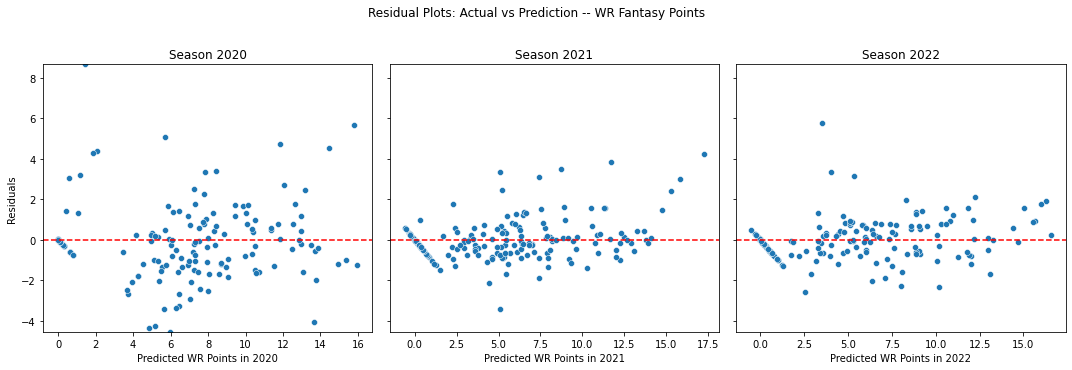

In [69]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = wr[f'te_prem_pts_pg_5ptd_{year}'] - wr[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- WR Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = wr[f'te_prem_pts_pg_5ptd_{year}'] - wr[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=wr[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted WR Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [72]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

                                     Feature  Importance
8                                   adp_2023    9.348173
9                 passy_last_yr_tm_stat_2023    7.285790
5                   te_prem_pts_pg_5ptd_2022    1.475112
3                           yds_per_opp_2022    1.318407
7                                   age_2023    1.308336
4                      catch_percentage_2022    0.617857
0                               ttl_opp_2022    0.563331
15                     catch_percentage_2021    0.467807
11                              ttl_opp_2021    0.458513
2                               avg_yac_2022    0.329280
13                              avg_yac_2021    0.262745
6                    pct_team_rec_yards_2022    0.252457
17                   pct_team_rec_yards_2021    0.230186
10           pts_scored_last_yr_tm_stat_2023    0.155012
16                  te_prem_pts_pg_5ptd_2021    0.149413
12  percent_share_of_intended_air_yards_2021    0.134965
1   percent_share_of_intended_a

## TE

In [73]:
# lets replace those 0s with nulls

season = ['2019', '2020', '2021', '2022']

for i in range(len(season)):
    year = season[i]
    te[[f'adp_{year}']] = te[[f'adp_{year}']].replace(0, np.nan)

te['adp_2020'].head()

player_name
Adam Trautman           NaN
Albert Okwuegbunam      NaN
Anthony Firkser         NaN
Austin Hooper         136.0
Blake Jarwin            NaN
Name: adp_2020, dtype: float64

In [74]:
# replacing 0's in scoring data with nan's 

te.loc[:, subset] = te.loc[:, subset].fillna(0)

In [77]:
# using 'current' season features (like, age or experience, and adp)

# let's trry with the same wr relevant stats
past_stats = ['ttl_opp', 'percent_share_of_intended_air_yards',
              'avg_yac', 'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd']

# another feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = te[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = te[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = te[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = te[[f'{stat}_{current_season}' for stat in past_stats]]
        X_test_c = te[[f'{stat}_{current_season}' for stat in current_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        te[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = te[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        te[f'fantasypoints_pg_{current_season}'] = predictions_23
    

Metrics for 2020 season:
Mean Squared Error: 5.836412850538944
R-squared: 0.735894653981674
--------------------
Metrics for 2021 season:
Mean Squared Error: 2.4147386088916782
R-squared: 0.885128917993667
--------------------
Metrics for 2022 season:
Mean Squared Error: 2.872739262192153
R-squared: 0.8403433735115443
--------------------


In [95]:
# trying again, but seeing if we can include data from 2 years back. it seems to have helped QB and RB models

# setting for reproducibility

np.random.seed(11)

# can we get use another season of data?


# getting te relevant stats
past_te_stats = ['ttl_opp', 'percent_share_of_intended_air_yards', 'avg_yac', 
                 'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd']

# including current season stats 
current_te_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']

target_seasons = ['2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    previous_season_2 = str(int(current_season) - 2)
    
    y = 'te_prem_pts_pg_5ptd'
        
    X_train_p = te[[f'{stat}_{previous_season}' for stat in past_te_stats]]
    X_train_c = te[[f'{stat}_{current_season}' for stat in current_te_stats]]
    
    X_train_p2 = te[[f'{stat}_{previous_season_2}' for stat in past_te_stats]]
    
    column_names_p = X_train_p.columns.tolist()
    column_names_c = X_train_c.columns.tolist()
    column_names_p2 = X_train_p2.columns.tolist()
    
    
    X_train = pd.concat([X_train_p, X_train_c, X_train_p2], axis=1, ignore_index=True)
    
    if current_season != '2023':
        y_train = te[[f'{y}_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = te[[f'{stat}_{previous_season}' for stat in past_te_stats]]
        X_test_p2 = te[[f'{stat}_{previous_season_2}' for stat in past_te_stats]]
        X_test_c = te[[f'{stat}_{current_season}' for stat in current_te_stats]]
        X_test = pd.concat([X_test_p, X_test_c, X_test_p2], axis=1, ignore_index=True)
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        te[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = te[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        te[f'fantasypoints_pg_{current_season}'] = predictions_23
        
    X_train.columns = column_names_p + column_names_c + column_names_p2

Metrics for 2021 season:
Mean Squared Error: 1.9941458452160847
R-squared: 0.9051368582608019
--------------------
Metrics for 2022 season:
Mean Squared Error: 1.796145418769005
R-squared: 0.9001766286215179
--------------------


In [96]:
te[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sample(20)

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Gerald Everett,5.806250,5.881347,7.853333,8.181229,8.593750,8.915089
Kaden Smith,0.000000,0.273931,0.000000,0.403689,0.000000,0.739327
Jonnu Smith,9.346667,9.212262,4.212500,7.774959,0.000000,-0.247623
Zach Ertz,6.863636,6.283167,10.629412,10.627838,11.160000,9.818639
T.J. Hockenson,10.831250,10.234958,11.941667,10.763741,12.435294,11.746965
Jake Ferguson,0.000000,0.273931,0.000000,0.278832,3.025000,3.178352
Richard Rodgers,5.035714,7.202277,0.000000,0.607194,0.000000,-0.100037
Delanie Walker,0.000000,2.300008,0.000000,0.965483,0.000000,0.375319
Jared Cook,8.493333,9.854687,8.025000,9.707192,0.000000,1.827568


In [82]:
te.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,age_2023,avg_cushion_2019,avg_cushion_2020,avg_cushion_2021,avg_cushion_2022,avg_cushion_2023,avg_expected_yac_2019,avg_expected_yac_2020,avg_expected_yac_2021,avg_expected_yac_2022,avg_expected_yac_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_separation_2019,avg_separation_2020,avg_separation_2021,avg_separation_2022,avg_separation_2023,avg_yac_2019,avg_yac_2020,avg_yac_2021,avg_yac_2022,avg_yac_2023,avg_yac_above_expectation_2019,avg_yac_above_expectation_2020,avg_yac_above_expectation_2021,avg_yac_above_expectation_2022,avg_yac_above_expectation_2023,catch_percentage_2019,catch_percentage_2020,catch_percentage_2021,catch_percentage_2022,catch_percentage_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,depth_team_2019,depth_team_2020,depth_team_2021,depth_team_2022,depth_team_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,non_pass_tds_2023,offense_2019,offense_2020,offense_2021,offense_2022,offense_2023,pass_2019,pass_2020,pass_2021,pass_2022,pass_2023,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingatt_2023,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingtd_2023,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passingyds_2023,passy_2019,passy_2020,passy_2021,passy_2022,passy_2023,passy_last_yr_tm_stat_2019,passy_last_yr_tm_stat_2020,passy_last_yr_tm_stat_2021,passy_last_yr_tm_stat_2022,passy_last_yr_tm_stat_2023,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,passyds_allowed_2023,pct_gs_2019,pct_gs_2020,pct_gs_2021,pct_gs_2022,pct_gs_2023,pct_team_pass_yards_2019,pct_team_pass_yards_2020,pct_team_pass_yards_2021,pct_team_pass_yards_2022,pct_team_pass_yards_2023,pct_team_rec_yards_2019,pct_team_rec_yards_2020,pct_team_rec_yards_2021,pct_team_rec_yards_2022,pct_team_rec_yards_2023,pct_team_rush_yard

In [63]:
te[['te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022', 'adp_2022']].sort_values('te_prem_pts_pg_5ptd_2022', ascending = False)

,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022,adp_2022
player_name,,,
Travis Kelce,18.488235,12.417827,17.0
George Kittle,13.366667,11.209161,45.0
Mark Andrews,12.566667,9.154511,23.0
T.J. Hockenson,12.435294,11.347268,72.0
Dallas Goedert,11.766667,9.912843,78.0
Zach Ertz,11.160000,10.785580,90.0
Evan Engram,10.288235,9.859354,NaN
David Njoku,10.142857,7.919197,NaN
Dalton Schultz,9.513333,9.860733,62.0


In [84]:
# PREDICTIONS FOR 2023

# PREDICTIONS FOR 2023

te_preds_1 = te[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False).head(36)

te_preds_1['pos'] = 'TE'
# need team in there, that'd be helpful

te_preds_1.head(10)

,fantasypoints_pg_2023,adp_2023,pos
player_name,,,
Travis Kelce,12.847563,9,TE
George Kittle,11.511529,49,TE
Dallas Goedert,11.511529,67,TE
Mark Andrews,11.466910,28,TE
Zach Ertz,10.814076,195,TE
Dalton Schultz,10.809739,97,TE
T.J. Hockenson,10.578773,41,TE
Evan Engram,10.353512,105,TE
Cole Kmet,10.036159,123,TE


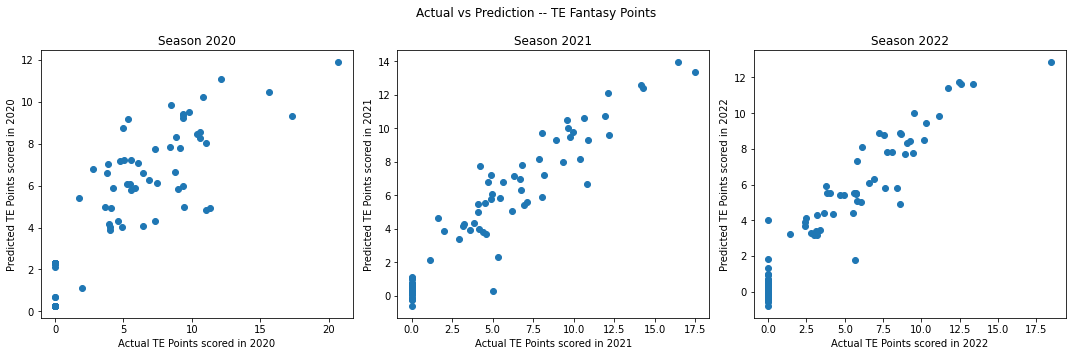

In [85]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- TE Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(te[f'te_prem_pts_pg_5ptd_{year}'], te[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual TE Points scored in {year}')
    ax.set_ylabel(f'Predicted TE Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

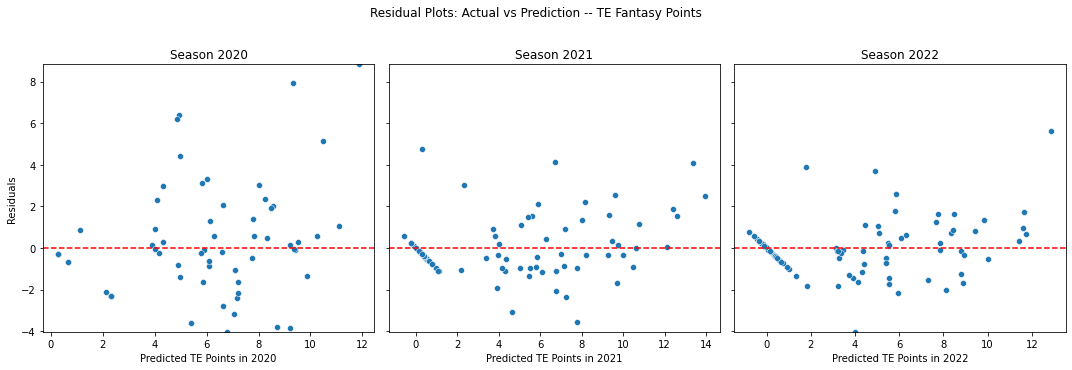

In [86]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = te[f'te_prem_pts_pg_5ptd_{year}'] - te[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- TE Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = te[f'te_prem_pts_pg_5ptd_{year}'] - te[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=te[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted TE Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [87]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

                                     Feature  Importance
9                 passy_last_yr_tm_stat_2023    3.734840
10           pts_scored_last_yr_tm_stat_2023    2.857392
5                   te_prem_pts_pg_5ptd_2022    2.664612
11                              ttl_opp_2021    2.313686
0                               ttl_opp_2022    1.902993
4                      catch_percentage_2022    1.265850
3                           yds_per_opp_2022    0.720062
15                     catch_percentage_2021    0.695648
1   percent_share_of_intended_air_yards_2022    0.499332
12  percent_share_of_intended_air_yards_2021    0.485141
14                          yds_per_opp_2021    0.102950
13                              avg_yac_2021    0.069652
7                                   age_2023    0.037186
2                               avg_yac_2022    0.031898
16                  te_prem_pts_pg_5ptd_2021    0.014448
6                            depth_team_2022    0.000000
8                              

### Combining Predictions

In [92]:
predictions_23_v1 = pd.concat([qb_preds_1, rb_preds_1, wr_preds_1, te_preds_1], axis =0)

predictions_23_v1['adp_2023'] = pd.to_numeric(predictions_23_v1['adp_2023'], errors='coerce')

In [93]:
# get positional ranks for predictions

predictions_23_v1['pos_pred_rank'] = predictions_23_v1.groupby('pos')['fantasypoints_pg_2023'].rank(method='average', \
                                                               ascending=False, na_option='bottom')


predictions_23_v1['pos_adp_rank'] = predictions_23_v1.groupby('pos')['adp_2023'].rank(method='average', \
                                                               ascending=True, na_option='bottom')

predictions_23_v1['rank_above_or_below'] = predictions_23_v1['pos_adp_rank'] - predictions_23_v1['pos_pred_rank']

predictions_23_v1.sort_values(by = 'adp_2023', inplace = True)
predictions_23_v1.head(15)

,fantasypoints_pg_2023,adp_2023,pos,pos_pred_rank,pos_adp_rank,rank_above_or_below
player_name,,,,,,
Christian McCaffrey,14.568357,1.0,RB,4.0,1.0,-3.0
Austin Ekeler,14.336368,2.0,RB,5.0,2.0,-3.0
Justin Jefferson,15.065096,3.0,WR,6.0,1.0,-5.0
Ja'Marr Chase,14.092174,4.0,WR,9.0,2.0,-7.0
Saquon Barkley,12.585160,5.0,RB,11.0,3.0,-8.0
Jonathan Taylor,11.178308,7.0,RB,15.0,4.0,-11.0
Derrick Henry,15.044511,8.0,RB,2.0,5.0,3.0
Travis Kelce,12.847563,9.0,TE,1.0,1.0,0.0
Nick Chubb,14.598677,10.0,RB,3.0,6.0,3.0


In [97]:
predictions_23_v1.sort_values('rank_above_or_below').head(10)

,fantasypoints_pg_2023,adp_2023,pos,pos_pred_rank,pos_adp_rank,rank_above_or_below
player_name,,,,,,
D.K. Metcalf,7.743752,35.0,WR,42.0,14.0,-28.0
Javonte Williams,8.099360,55.0,RB,44.0,22.0,-22.0
Kadarius Toney,6.600015,70.0,WR,50.0,28.0,-22.0
Diontae Johnson,7.068457,61.0,WR,45.0,24.0,-21.0
James Cook,7.887241,82.0,RB,46.0,28.0,-18.0
Najee Harris,9.469647,19.0,RB,27.0,9.0,-18.0
Deebo Samuel,10.110094,32.0,WR,27.0,12.0,-15.0
Jared Goff,14.257554,126.0,QB,27.0,13.0,-14.0
Travis Etienne,9.692503,20.0,RB,24.0,10.0,-14.0


In [98]:
predictions_23_v1.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/predictions_v2.csv")

In [250]:
sc = StandardScaler()

rb_trans = sc.fit_transform(rb_X)

rb_trans = pd.DataFrame(rb_trans, columns = rb_X.columns)

rb_trans.head()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
0,0.857371,1.353038,0.979104,1.028151,0.676624,0.828111,-0.192836
1,1.521287,1.060931,0.543572,1.841323,0.246383,-0.275557,0.260849
2,0.084806,0.510845,-0.327493,0.721892,0.626496,0.300163,0.803650
3,-0.762565,-1.046939,1.850169,-0.999498,-2.192612,-1.774410,-1.165018
4,1.418804,0.098004,1.414637,-0.334176,-0.248416,0.491843,0.414777


<AxesSubplot:>

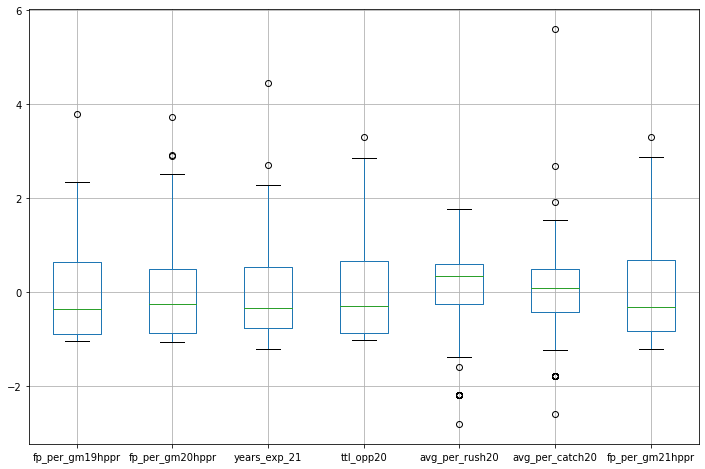

In [251]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [252]:
rb_trans.columns

Index(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20',
       'avg_per_rush20', 'avg_per_catch20', 'fp_per_gm21hppr'],
      dtype='object')

fp_per_gm, ttl_opp,and years_exp all have right skewed distributions, exponential like.

avg_per_rush has a left skewed distribution. Avg per catch is about normal.

In [253]:
fpg19_trans = stats.yeojohnson(rb_trans['fp_per_gm19hppr'])
fpg20_trans = stats.yeojohnson(rb_trans['fp_per_gm20hppr'])
ye21_trans = stats.yeojohnson(rb_trans['years_exp_21'])
to20_trans = stats.yeojohnson(rb_trans['ttl_opp20'])
fpg21_trans = stats.yeojohnson(rb_trans['fp_per_gm21hppr'])



In [254]:
rb_trans_unskewed = pd.DataFrame([pd.Series(fpg19_trans), pd.Series(fpg20_trans), pd.Series(ye21_trans), 
                                  pd.Series(to20_trans), pd.Series(fpg21_trans)],
                                 columns = ['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'])

In [256]:
rb_trans['fpg19_trans'] = pd.Series(fpg19_trans[0])
rb_trans['fpg20_trans'] = pd.Series(fpg20_trans[0])
rb_trans['ye21_trans'] = pd.Series(ye21_trans[0])
rb_trans['to20_trans'] = pd.Series(to20_trans[0])
rb_trans['fpg21_trans'] = pd.Series(fpg21_trans[0])

<AxesSubplot:>

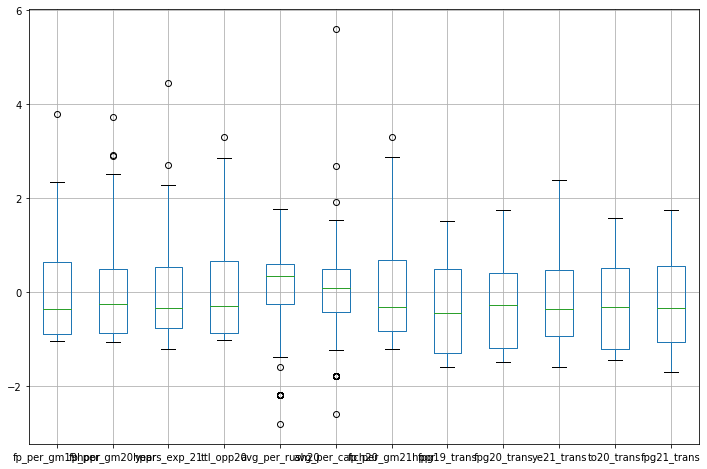

In [257]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [258]:
rb_pp = rb_trans.drop(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'], axis = 1)

In [259]:
rb_pp


,avg_per_rush20,avg_per_catch20,fpg19_trans,fpg20_trans,ye21_trans,to20_trans,fpg21_trans
0,0.676624,0.828111,0.612516,0.915854,0.779829,0.736543,-0.206703
1,0.246383,-0.275557,0.909995,0.765811,0.472132,1.109273,0.238437
2,0.626496,0.300163,0.081285,0.426331,-0.359406,0.560688,0.634175
3,-2.192612,-1.774410,-1.065761,-1.489014,1.287651,-1.428294,-1.642071
4,-0.248416,0.491843,0.869789,0.094184,1.047986,-0.383040,0.362020
...,...,...,...,...,...,...,...
124,0.123730,-0.484990,-1.294843,-0.521884,-1.593260,-0.628526,-0.570283
125,0.366319,0.085480,-1.294843,-0.878089,-1.593260,-0.801898,-0.727639
126,0.443151,-0.406844,-1.294843,-0.692514,0.104627,-1.021354,0.611544
127,0.161739,1.918020,-1.294843,-0.629125,-1.593260,-1.109932,-0.704624


In [260]:
rb_pp_X = rb_pp.drop(['fpg21_trans'], axis = 1)
rb_pp_y = rb_pp['fpg21_trans']

rb_pp_x_train, rb_pp_x_test, rb_pp_y_train, rb_pp_y_test = train_test_split(rb_pp_X, rb_pp_y, test_size = .25, random_state = 0)

### LINEAR REGRESSION

In [261]:
lin_reg = LinearRegression()

lin_reg.fit(rb_pp_x_train, rb_pp_y_train)

LinearRegression()

In [262]:
lr_pred_test = lin_reg.predict(rb_pp_x_test)
lr_pred_train = lin_reg.predict(rb_pp_x_train)

lr_pred_test

array([ 0.04565147, -0.8995001 , -1.35935225,  0.78911808, -1.1617012 ,
       -0.57737567, -1.16954314, -0.09259256,  0.37836419, -1.09555592,
        0.57769406,  0.45380238, -0.64683291,  1.24896293,  0.19760374,
       -0.26181442,  0.33881409,  0.10094705,  0.0896751 ,  0.14422218,
        0.94817751, -1.23167503, -0.01183887,  0.30318729, -0.68287698,
       -0.64625817, -1.16176251,  0.9149031 , -0.77770382, -0.42332721,
       -1.20907459, -1.2477523 , -1.26902687])

# we may have to transform transformed errors back into normal

### See note below on how to possibly do this

It sounds like you effectively want the geometric standard error, akin to the geometric mean exp(mean(log(x))).

While it might seem reasonable to compute that as:

exp(sd(log(x)/sqrt(n-1)))

You and others have already pointed out that that isn't correct for a few reasons. Instead, use:

exp(mean(log(x))) * (sd(log(x))/sqrt(n-1))


In [263]:
values_lr = ['Logistic Regression', np.sqrt(mean_squared_error(rb_pp_y_train, lr_pred_train)),
         np.sqrt(mean_squared_error(rb_pp_y_test, lr_pred_test))]

values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)

C:\Users\steph\AppData\Local\Temp/ipykernel_34584/2792587993.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)


In [264]:
values

,Model Type,Train Error,Test Error
0,Decision Tree,0.000000,0.465304
1,Logistic Regression,0.577881,0.673765
